In [14]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import pickle 

In [15]:
#Load pickle file

X = pickle.load(open("X_axis", "rb"))
y = pickle.load(open("y_axis", "rb"))

In [16]:
#creat Sequetial learning Model Object.

model = Sequential()

### Trainning Model

In [11]:
X = X/255.0

model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2)))


model.add(Flatten())
model.add(Dense(64))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ['accuracy'])


history=model.fit(X,y, batch_size = 32,epochs = 3,validation_split = 0.1)

Instructions for updating:
Colocations handled automatically by placer.
Train on 270 samples, validate on 30 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
270/270 [==============================] - 221s 817ms/sample - loss: 0.8826 - acc: 0.6852 - val_loss: 0.5563 - val_acc: 0.8000
Epoch 2/3
270/270 [==============================] - 39s 143ms/sample - loss: 0.4530 - acc: 0.7889 - val_loss: 0.4630 - val_acc: 0.7000
Epoch 3/3
270/270 [==============================] - 31s 115ms/sample - loss: 0.3828 - acc: 0.7667 - val_loss: 0.4079 - val_acc: 0.7667


In [17]:
#save Model to reuse

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")


print("saved model files to disk")

saved model files to disk


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


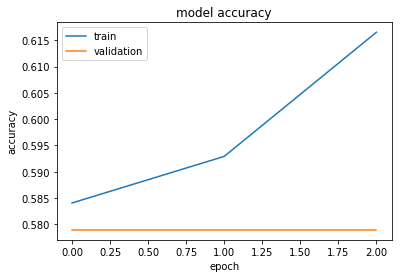

In [8]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')